# **Time**
As another example of a programmer-defined type, defining a class called
Time that records the time of day. 

The class definition looks like this:

In [5]:
class Time:
  """
  Represents the time of day.
   attributes: hour, minute, second
  """


a new Time object  can be created  and assign attributes for hours, minutes, and
seconds:

In [6]:
time = Time()
time.hour = 11
time.minute = 59
time.second = 30

The state diagram for the Time object looks like Figure 16-1.

As an exercise, write a function called **print_time** that takes a Time object and prints it in the form **hour:minute:second**. 

Hint: the format sequence '%.2d' prints an integer using at least two digits, including a leading zero if necessary.

Write a boolean function called is_after that takes two Time objects, t1 and t2,
and returns True if t1 follows t2 chronologically and False otherwise.

Challenge: don’t use an if statement.

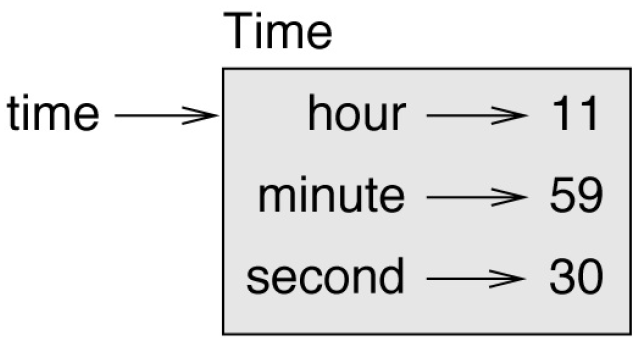

                                   **Object Diagram**

# **Pure Functions**
Writing two functions that add time values. 

They demonstrate two kinds of functions: **Pure functions** and **Modifiers**. 

They also demonstrate a development plan called as prototype and patch, which is a way of tackling a complex problem by starting with a simple prototype and
incrementally dealing with the complications.

Here is a simple prototype of add_time:

In [8]:
def add_time(t1, t2):
  sum = Time()
  sum.hour = t1.hour + t2.hour
  sum.minute = t1.minute + t2.minute
  sum.second = t1.second + t2.second
  return sum

time1 = Time()
time1.hour = 11
time1.minute = 30
time1.second = 36

time2 = Time()
time2.hour = 11
time2.minute = 30
time2.second = 36


**Pure Function Definition**: The function **creates a new** Time **object**, **initializes its attributes**, and **returns a reference to the new object**. 

This is called a **Pure Function** because it **does not modify** any of the objects passed to it as arguments and it has no effect, like displaying a value or getting user input, other than returning a value.

To test this function, two Time objects are created : start contains the start time of a movie, like Monty Python and the Holy Grail, and duration contains the
runtime of the movie, which is 1 hour 35 minutes.

add_time figures out when the movie will be done:

In [9]:
start = Time()
start.hour = 9
start.minute = 45
start.second = 0
duration = Time()
duration.hour = 1
duration.minute = 35
duration.second = 0
done = add_time(start, duration)
print_time(done)


NameError: ignored

The Output will look as follows:

10:80:00

The problem is that this function does not deal with cases where the number of seconds or minutes adds up to more than sixty.

When that happens, which has to be taken as a “carry” for the extra seconds into the minute column or the extra minutes into the hour column.

Here’s an improved version:

In [ ]:
def add_time(t1, t2):
  sum = Time()
  sum.hour = t1.hour + t2.hour
  sum.minute = t1.minute + t2.minute
  sum.second = t1.second + t2.second
  if sum.second >= 60:
    sum.second -= 60
    sum.minute += 1
  if sum.minute >= 60:
    sum.minute -= 60
    sum.hour += 1
return sum

# **Modifiers**
**Definition of Modifiers**: Sometimes it is useful for a function to **modify the contnts of the objects**, which it gets as parameters.

In that case, the changes are visible to the caller. 

Functions that work this way are called **Modifiers**.

increment, which adds a given number of seconds to a Time object, can be
written naturally as a modifier. 

Here is a rough draft:

In [ ]:
def increment(time, seconds):
  time.second += seconds
  if time.second >= 60:
    time.second -= 60
    time.minute += 1
  if time.minute >= 60:
    time.minute -= 60
    time.hour += 1

The first line performs the basic operation; the remainder deals with the special cases seen before.

Is this function correct? 

What happens if seconds is much greater than 60?

In that case, it is not enough to carry once; we have to keep doing it until
**time.second** is less than 60.

One solution is to replace the if statements with while statements. 

That would make the function correct, but not very efficient.

As an exercise, write a correct version of increment that doesn’t contain any
loops.

Anything that can be done with modifiers can also be done with pure functions.

In fact, **some programming languages** only allow **Pure functions**.

There is some evidence that programs that use pure functions are faster to develop and less error-prone than programs that use modifiers. 

But **Modifiers** are convenient at times, and functional programs tend to be less efficient.

In general, it is suggested to write pure functions whenever it is reasonable
and resort to modifiers only if there is a compelling advantage.

This approach might be called a functional programming style.

As an exercise, write a “pure” version of increment that creates and returns a
new Time object rather than modifying the parameter.


# **Prototyping versus Planning**
 Now demonstrating the development plan which is called “**Prototype and Patch**”. 

For each function, a prototype is written which performs the basic calculation and then tested it, patching errors along the way.

But incremental corrections can generate code that is unnecessarily complicated (since it deals with many special cases) and unreliable (since it is hard to know if you have found all the errors).

An alternative is designed for code development, in which high-level insight into the problem can make the programming much easier.

In this case, the insight is that a Time object is really a three-digit number in base 60 (see http://en.wikipedia.org/wiki/Sexagesimal.)! 

The second attribute is the “ones column”, the minute attribute is the “sixties column”, and the hour attribute is the “thirty-six hundreds column”.

When add_time and increment is written, by effectively doing addition in base 60, which is why we had to carry from one column to the next.

This observation suggests another approach to the whole problem —  Time objects  can be converted to integers and take advantage of the fact that the computer knows how to do integer arithmetic.

Here is a function that converts Times to integers:

In [11]:
def time_to_int(time):
  minutes = time.hour*60 + time.minute
  seconds = minutes*60 + time.second
  return seconds

And here is a function that converts an integer to a Time (recall that divmod
divides the first argument by the second and returns the quotient and remainder
as a tuple):

In [12]:
def int_to_time(seconds):
  time = Time()
  # The divmod() function returns a tuple containing the quotient  and the remainder when argument1 (dividend) is divided by argument2 (divisor).
  minutes, time.second = divmod(seconds, 60)
  time.hour, time.minute = divmod(minutes, 60)
  return time

After executing the code, some tests are to be conducted,  for assuring that these functions are behaving correctly. 

One way to test them is to check that **time_to_int(int_to_time(x)) == x** for many values of x. 

This is an example of a consistency check.

Once convinced they are correct, code can be used to rewrite add_time:

In [13]:
def add_time(t1, t2):
  seconds = time_to_int(t1) + time_to_int(t2)
  return int_to_time(seconds)

This version is shorter than the original, and easier to verify. 

As an exercise, rewrite increment using time_to_int and int_to_time.

In some ways, converting from base 60 to base 10 and back is harder than just
dealing with times. 

Base conversion is more abstract; our intuition for dealing with time values is better.

Treating times as base 60 numbers and make the investment of writing the conversion functions (time_to_int and int_to_time), result will be a program that is shorter, easier to read and debug, and more reliable.

It is also easier to add features later. 

For example, imagine subtracting two Times to find the duration between them. 

The naive approach would be to implement subtraction with borrowing. 

Using the conversion functions would be easier and more likely to be correct.

Ironically, sometimes making a problem harder (or more general) makes it easier
(because there are fewer special cases and fewer opportunities for error).

# **Glossary**
**Prototype and Patch**:
A development plan that involves writing a rough draft of a program,
testing, and correcting errors as they are found.

**Designed Development**:
A development plan that involves high-level insight into the problem and
more planning than incremental development or prototype development.

**Pure Function**:
A function that does not modify any of the objects it receives as arguments.
Most pure functions are fruitful.

**Modifier**:
A function that changes one or more of the objects it receives as arguments.
Most modifiers are void; that is, they return None.

**Functional Programming Style**:
A style of program design in which the majority of functions are pure.

**Invariant**:
A condition that should always be true during the execution of a program.

**Assert Statement**:
A statement that check a condition and raises an exception if it fails.


# **Exercises:**

**Exercise 1**.

Write a function called mul_time that takes a Time object and a number and
returns a new Time object that contains the product of the original Time and the
number.

Then use mul_time to write a function that takes a Time object that represents
the finishing time in a race, and a number that represents the distance, and
returns a Time object that represents the average pace (time per mile).

**Exercise 2**.

The datetime module provides time objects that are similar to the Time objects
in this chapter, but they provide a rich set of methods and operators. 

Read the documentation at http://docs.python.org/3/library/datetime.html.

    1. Use the datetime module to write a program that gets the current date and
       prints the day of the week.

    2. Write a program that takes a birthday as input and prints the user’s 
       age and the number of days, hours, minutes and seconds until their   
       next birthday.

    3. For two people born on different days, there is a day when one is twice  
       as old as the other. 
       That’s their Double Day. 
       Write a program that takes two birthdays and computes their Double Day.

    4. For a little more challenge, write the more general version that computes
       the day when one person is n times older than the other.